Alluvial diagrams are a type of flow diagram originally developed to represent changes in network structure over time. In allusion to both their visual appearance and their emphasis on flow, alluvial diagrams are named after alluvial fans that are naturally formed by the soil deposited from streaming water.
Variables are assigned to vertical axes that are parallel. Values are represented with blocks on each axis. The height of a block represents the size of the cluster and the height of a stream field represents the size of the components contained in both blocks connected by the stream field.
Alluvial diagram is a variant of the Parallel Sets but for categorical variables and often to display trends over time and phases.

![alt text](https://datavizproject.com/wp-content/uploads/2016/06/DVP_1_100-93.png "")

# Example
## Plotly
Jupyter lab에서 plotly 그래프를 보기 위해서는 `conda install -c conda-forge jupyterlab-plotly-extension` 명령으로 extension을 설치해야한다.

In [1]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

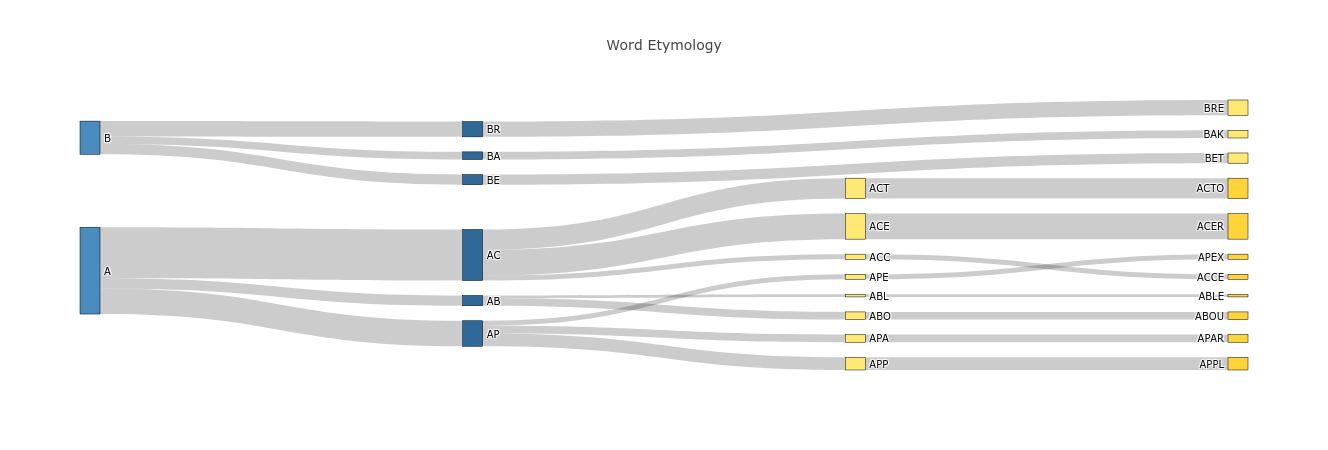

In [6]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
#import plotly.plotly as py
init_notebook_mode(connected=True)

df = pd.DataFrame(
    {
        'lvl1': ['A','A','A','A','A','A','A','A','B','B','B'],
        'lvl2': ['AP','AP','AP','AC','AC','AC','AB','AB','BE','BR','BA'],
        'lvl3': ['APP','APE','APA','ACT','ACC','ACE','ABL','ABO','BET','BRE','BAK'],
        'lvl4': ['APPL','APEX','APAR','ACTO','ACCE','ACER','ABLE','ABOU',None,None,None],
        'count': [5,2,3,8,2,10,1,3,4,6,3]
    }
)

fig = genSankey(df,cat_cols=['lvl1','lvl2','lvl3','lvl4'],value_cols='count',title='Word Etymology')
#plotly.offline.plot(fig, validate=False)
iplot(fig, validate=False)

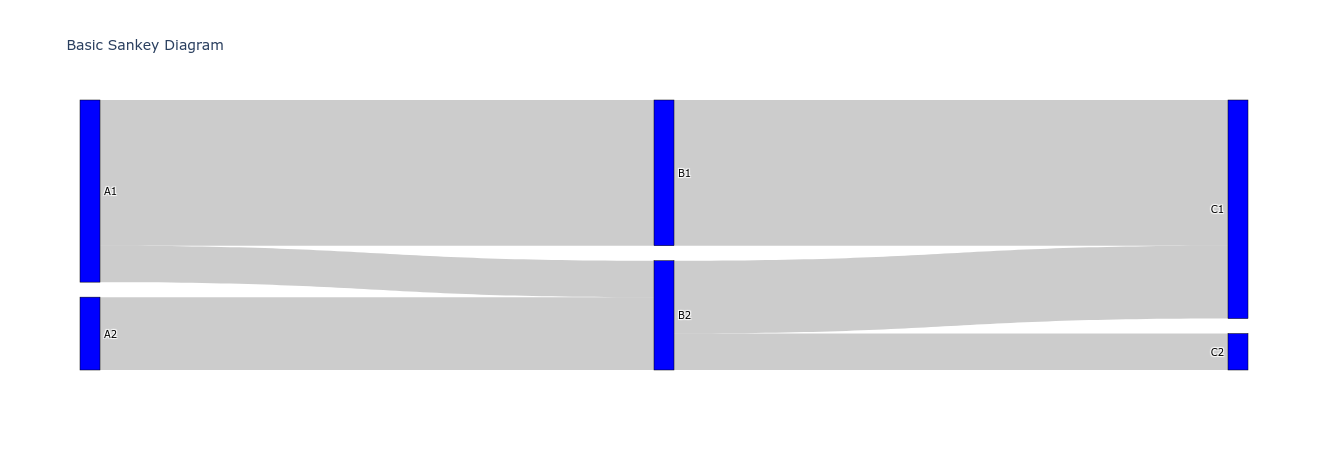

In [7]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()